Test de permutación de un score con permutation_test_score --- 7:34
===

* Ultima modificación: 2023-02-27 | [YouTube](https://www.youtube.com/watch?v=EdOeyRCTDlw&list=PLEFpZ3YehTnCPxLgTaW4WnPZbLeilZERm&index=5)

* Evalua la significancia de un score computado con validación cruzada usando permutaciones.

* Se permuta la variable de salida para generar datos aleatorios y computar un valor p empírico en contra de la hipótesis nula de que las variables de entrada y la salida son independientes.

Datos
---

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Experimento 1
---

In [2]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.svm import SVC

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score, permutation_scores, pvalue = permutation_test_score(
    # -------------------------------------------------------------------------
    # The object to use to fit the data.
    estimator=clf,
    # -------------------------------------------------------------------------
    # The data to fit.
    X=X,
    # -------------------------------------------------------------------------
    # The target variable to try to predict in the case of supervised learning.
    y=y,
    # -------------------------------------------------------------------------
    # Labels to constrain permutation within groups, i.e. y values are permuted
    # among samples with the same group identifier. When not specified, 
    # y values are permuted among all samples.
    groups=None,
    # -------------------------------------------------------------------------
    # Metric
    scoring="accuracy",
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy. 
    cv=cv,
    # -------------------------------------------------------------------------
    # Number of times to permute y.
    n_permutations=1000,
    # -------------------------------------------------------------------------
    # Pass an int for reproducible output for permutation of y values among
    # samples.
    random_state=0,
    # -------------------------------------------------------------------------
    # The verbosity level.
    verbose=0,
    # -------------------------------------------------------------------------
    # Parameters to pass to the fit method of the estimator.
    fit_params=None,
)

score

0.9666666666666667

In [3]:
permutation_scores[:10]

array([0.33333333, 0.26      , 0.35333333, 0.37333333, 0.33333333,
       0.36666667, 0.34      , 0.38      , 0.36666667, 0.34666667])

In [4]:
pvalue

0.000999000999000999

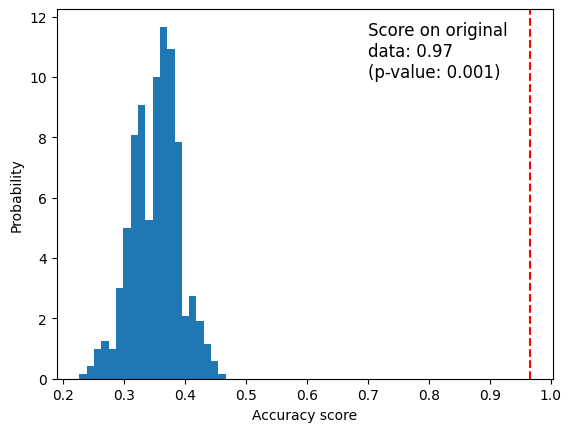

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(permutation_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()

Experimento 2
---

In [6]:
import numpy as np

n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

In [7]:
score, permutation_scores, pvalue = permutation_test_score(
    clf,
    X_rand,
    y,
    scoring="accuracy",
    cv=cv,
    n_permutations=1000,
)

score

0.30000000000000004

In [8]:
permutation_scores[:10]

array([0.39333333, 0.28666667, 0.34      , 0.28      , 0.32      ,
       0.28      , 0.33333333, 0.31333333, 0.34      , 0.29333333])

In [9]:
pvalue

0.7772227772227772

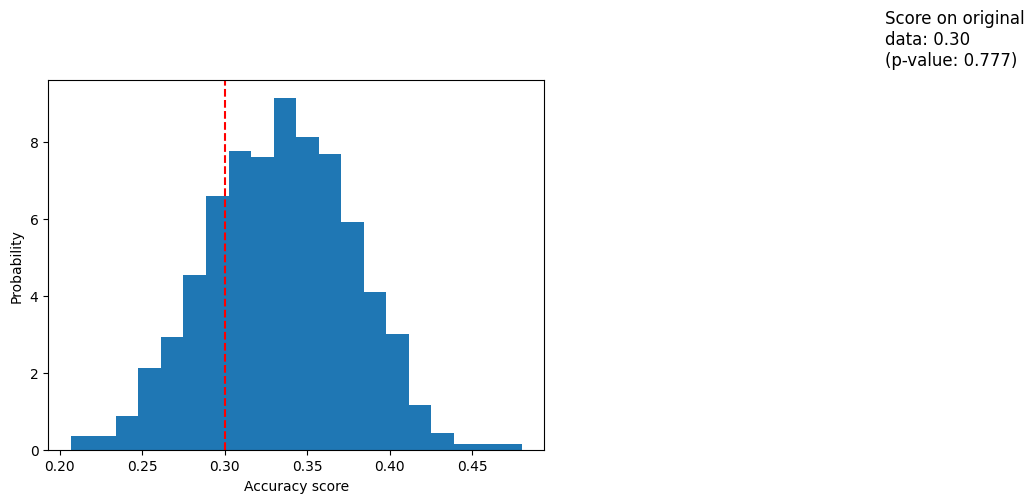

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(permutation_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()